In [4]:
import numpy as np
from pypoman import compute_polytope_halfspaces

vertices = map(
    np.array,
    [[1, 1], [1, 2], [2, 2], [2, 1]],
)
#这个确实是正方形的内部
A, b = compute_polytope_halfspaces(vertices)
print(A)
print(b)

[[-0. -1.]
 [-1. -0.]
 [-0.  1.]
 [ 1. -0.]]
[-1. -1.  2.  2.]


In [12]:
import numpy as np
from pypoman import compute_polytope_halfspaces

vertices = map(
    np.array,
    [[1, 1], [2, 1], [3, 2], [1.5, 3],[0,2]]
)
A, b = compute_polytope_halfspaces(vertices)
print(A)
print(b)

[[-0.  -1. ]
 [-1.   1.5]
 [-1.  -1. ]
 [ 1.   1.5]
 [ 1.  -1. ]]
[-1.  3. -2.  6.  1.]


C:\Users\26747\AppData\Roaming\Python\Python310\site-packages\pypoman\duality.py:95: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  V = np.vstack(vertices)


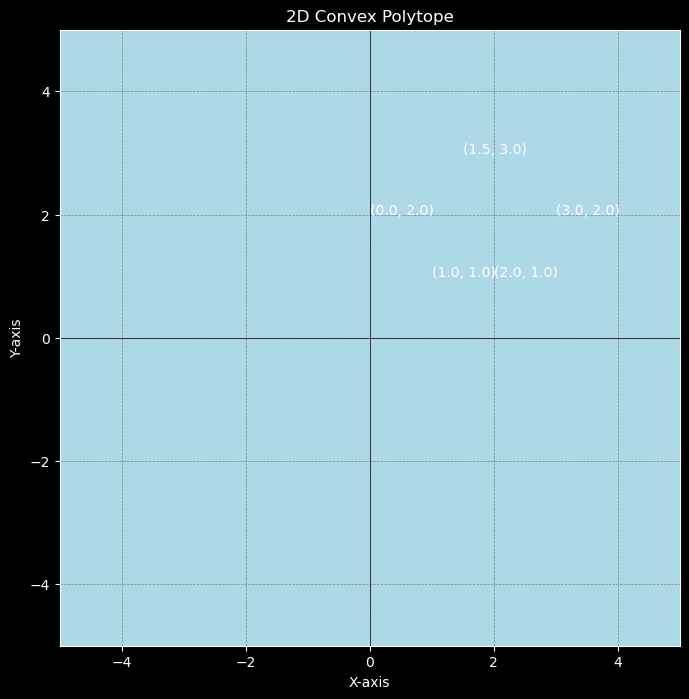

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the coefficients of the inequalities
A = np.array([[-0, -1], [-1, 1.5], [-1, -1], [1, 1.5], [1, -1]])
b = np.array([-1, 3, -2, 6, 1])

# Create a wider grid of points for plotting
x = np.linspace(-20, 20, 400)
y = np.linspace(-20, 20, 400)
X, Y = np.meshgrid(x, y)

# Apply the inequalities to each point in the grid
ineq1 = A[0,0]*X + A[0,1]*Y <= b[0]
ineq2 = A[1,0]*X + A[1,1]*Y <= b[1]
ineq3 = A[2,0]*X + A[2,1]*Y <= b[2]
ineq4 = A[3,0]*X + A[3,1]*Y <= b[3]
ineq5 = A[4,0]*X + A[4,1]*Y <= b[4]

# Combine the inequalities to find the common area
region = ineq1 & ineq2 & ineq3 & ineq4 & ineq5
xmin = -5
xmax = 5
ymin = -5
ymax = 5

vertices = np.array([[1, 1], [2, 1], [3, 2], [1.5, 3],[0,2]])

# Plotting
plt.figure(figsize=(8, 8))
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.contourf(X, Y, region, levels=1, colors=["lightblue"])
for v in vertices:
    plt.text(v[0], v[1], f'({v[0]}, {v[1]})')  # Label vertices
plt.title('2D Convex Polytope')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
